Pixeltests School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [2]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/pixeltests/datasets/main/'

    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model.

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [3]:
def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols)
    df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
    df['BOROUGH'] = df['BOROUGH'].astype(object)
    df['SALE PRICE'] = df['SALE PRICE'].str.replace('[^\d-]', '', regex=True).astype(int)
    df = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']
    df = df[(df['SALE PRICE'] >=100000) & (df['SALE PRICE'] <=2000000)]
    return df

filepath = DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [4]:
import pandas as pd
df = wrangle(filepath)
df.head(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
44,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000,2019-01-01
61,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001.0,1940.0,200000,2019-01-01
78,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043.0,1925.0,810000,2019-01-02
108,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680.0,1899.0,125000,2019-01-02
111,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872.0,1940.0,620000,2019-01-02
120,3,MADISON,01 ONE FAMILY DWELLINGS,1932.0,1930.0,1150000,2019-01-02
121,3,MIDWOOD,01 ONE FAMILY DWELLINGS,1722.0,1920.0,836500,2019-01-02
132,4,BAYSIDE,01 ONE FAMILY DWELLINGS,1396.0,1930.0,955000,2019-01-02
137,4,ELMHURST,01 ONE FAMILY DWELLINGS,1260.0,1935.0,820000,2019-01-02
141,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1440.0,1945.0,980000,2019-01-02


**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [68]:
# Perform your exploratory data analysis here and
# modify the wrangle function above
# df.info()
# df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
# df['BOROUGH'] = df['BOROUGH'].astype(object)
# df['SALE PRICE'] = df['SALE PRICE'].str.replace('[^\d-]', '', regex=True).astype(int)
# df = df[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']
# df = df[(df['SALE PRICE'] >=100000) & (df['SALE PRICE'] <=2000000)]
# df.info()
# df.dtypes
# df.head()

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [31]:
train = df[(df['SALE DATE']<'2019-04-01')]
# need not to use loc[]
test = df[(df['SALE DATE']>='2019-04-01')]
# X = ['SALE PRICE']
# y =
# test.head(4)

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019.
- Your test set should include data from April 2019.

In [41]:
X_train = train.drop('SALE PRICE',axis = 1)
y_train = train['SALE PRICE']

X_test = test.drop('SALE PRICE',axis = 1)
y_test = test['SALE PRICE']

In [42]:
X_train.shape

(2517, 6)

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [56]:
guess = y_train.mean()
print('Guess : ',guess)
errors = guess-y_test
baseline_mae = errors.abs().mean()
print('Baseline MAE:', baseline_mae)

Guess :  621011.2721493841
Baseline MAE: 214285.13568936792


# IV. Build Model

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [67]:
import category_encoders as ce

ohe = ce.OneHotEncoder(use_cat_names=True)

XT_train = ohe.fit_transform(X_train)
# print(XT_train.shape)
XT_test = ohe.transform(X_test)
# print(XT_test.shape)

**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [59]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

XT_train.drop('SALE DATE',axis=1,inplace=True)
XT_test.drop('SALE DATE',axis=1,inplace=True)

model_lr.fit(XT_train,y_train)

LinearRegression()

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [60]:
from IPython.display import display, HTML
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

for alpha in [1.0]:

    # Fit Ridge Regression model
    display(HTML(f'Ridge Regression, with alpha={alpha}'))
    model_r = Ridge(alpha=alpha)
    model_r.fit(XT_train, y_train)
    y_pred = model_r.predict(XT_test)

    # Get Test MAE
    mae = mean_absolute_error(y_test, y_pred)
    display(HTML(f'Test Mean Absolute Error: ${mae:,.0f}'))

    # Plot coefficients
    coefficients = pd.Series(model_r.coef_, XT_train.columns)
    # plt.figure(figsize=(20,185))
    # coefficients.sort_values().plot.barh(color='grey')
    # plt.xlim(-400,700)
    # plt.show()

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [62]:
# from sklearn.metrics import mean_absolute_error
y_pred_train = model_lr.predict(XT_train)
# y_pred_train.shape
y_pred_test = model_lr.predict(XT_test)

training_mae_lr = mean_absolute_error(y_train, y_pred_train)
test_mae_lr = mean_absolute_error(y_test, y_pred_test)

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 130970.34664282876
Linear Test MAE: 7071877392107.064


**Task 10:** Check the training and test metrics for `model_r`.

In [63]:
y_pred_train = model_r.predict(XT_train)
# y_pred_train.shape
y_pred_test = model_r.predict(XT_test)

training_mae_r = mean_absolute_error(y_train, y_pred_train)
test_mae_r = mean_absolute_error(y_test, y_pred_test)


print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 127630.5650778739
Ridge Test MAE: 141206.1668531332


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [65]:
# Caculate R^2 score
from sklearn.metrics import r2_score

training_r2 = model_r.score(XT_train,y_train)
test_r2 = model_r.score(XT_test,y_test)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.6154355712168953
Test MAE: 0.4801135314484869


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

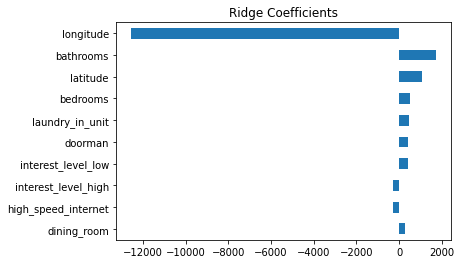

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

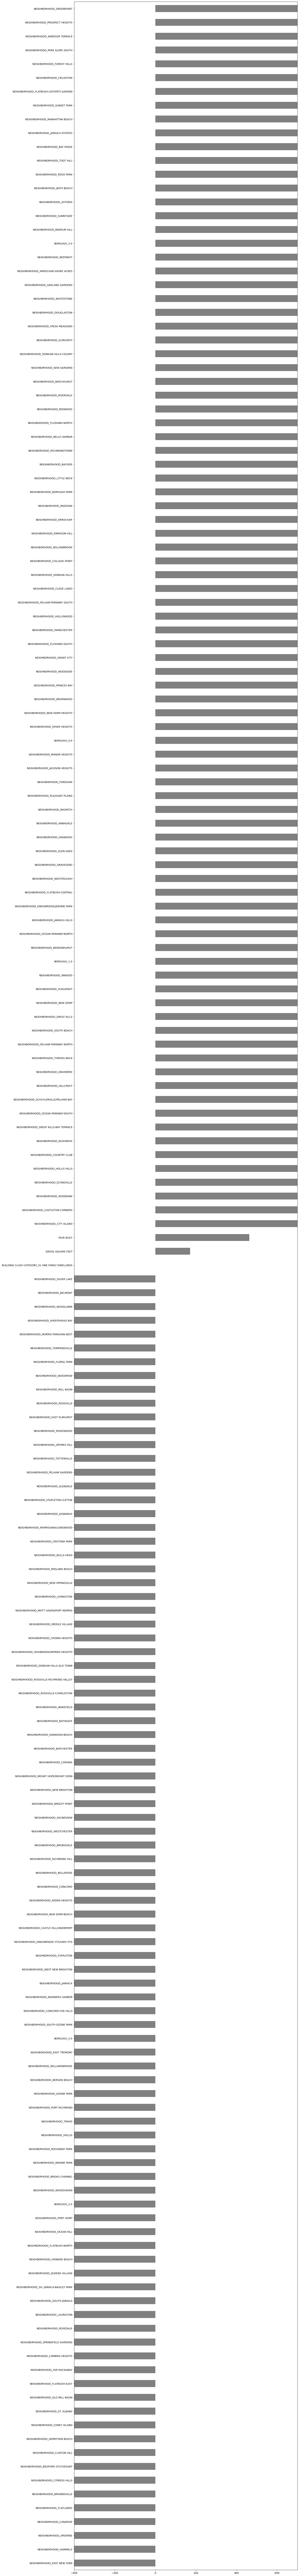

In [66]:
plt.figure(figsize=(16,185))
coefficients.sort_values().plot.barh(color='grey')
plt.xlim(-400,700)
plt.show()